In [1]:
import numpy as np
from torchvision import datasets, transforms
from PIL import Image
from IPython.display import display
from model.unet import Unet
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [8]:
def linear_beta_schedule(timesteps=1000, device='cpu'):
    beta_0 = 0.0001
    beta_T = 0.02
    betas = torch.linspace(0.0001, 0.02, steps=timesteps)

    alphas = 1. - betas
    alphas_bar = torch.cumprod(alphas, dim=0)

    return betas, alphas, alphas_bar

Files already downloaded and verified
Files already downloaded and verified
6250
1250
2
torch.Size([8, 3, 32, 32])
torch.Size([8])
tensor(2)


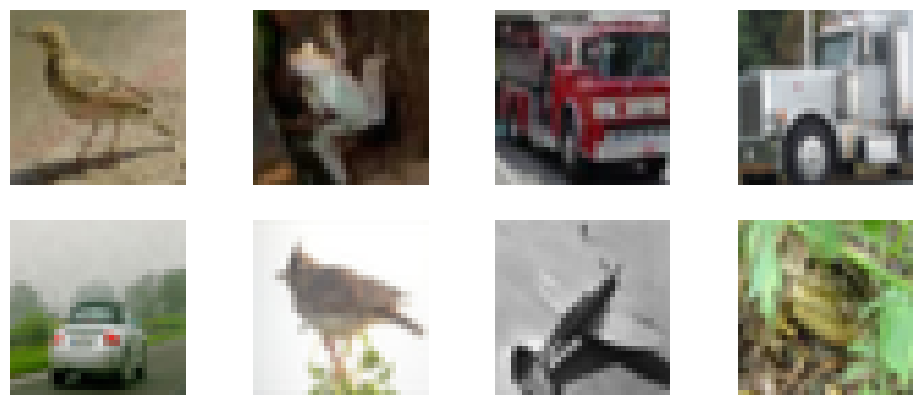

In [3]:
batch_size = 8
device='cuda'

dataloader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data/', train=True, download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                  ])
                 ),
    batch_size=batch_size, shuffle=True
)

dataloader_valid = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data/', train=False, download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                  ])
                 ),
    batch_size=batch_size, shuffle=True
)

# 시각화
def visualize(img, epoch=0):
    if img.shape[0] == 1:
        plt.figure(figsize=(2,2))
        img = img.squeeze().permute(1,2,0)
        plt.imshow(img)
        plt.show()
    elif img.shape[0]>1 and len(img.shape)>2:
        fig, axes = plt.subplots(2, 4, figsize=(12, 5))
        for i, ax in enumerate(axes.flat):
            ax.imshow(img[i].squeeze().permute(1,2,0))
            ax.axis('off')
        # plt.savefig(f'{output_path}/valid_{epoch}.png')
        plt.show()

# 데이터 체크
print(len(dataloader)) # 6250
print(len(dataloader_valid)) # 1250

data = next(iter(dataloader))
print(len(data))
print(data[0].shape)
print(data[1].shape)
print(data[1][0])

visualize(data[0])

In [4]:
batch_size = 8
learning_rate = 0.001
epochs = 10

optimizer = torch.optim.Adam(unet.parameters(), lr=learning_rate)

trainer = {
    'train_losses': [],
    'valid_losses': []
}

NameError: name 'unet' is not defined

In [ ]:
for epoch in range(epochs):
    unet.train()
    for idx, data in enumerate(dataloader):
        img = data[0].to(device)
        b, c, h, w = img.shape
                
        timesteps = torch.randint(1, 1001, (bs,))
        added_noise = torch.randn_like(img)

In [42]:
img = data[0]
print(img.shape)
b, c, h, w = img.shape
timesteps = torch.randint(1, 1001, (b,))
print(timesteps.shape)

added_noise = torch.randn_like(img)
print(added_noise.shape)

def q_sample(x_0, timesteps, noise):
    return torch.stack([torch.sqrt(alphas_bar[t])*x_0[idx] + torch.sqrt(1-alphas_bar[t])*noise[idx] for idx, t in enumerate(timesteps)])

torch.Size([8, 3, 32, 32])
torch.Size([8])
torch.Size([8, 3, 32, 32])


In [43]:
betas, alphas, alphas_bar = linear_beta_schedule(1000)

In [45]:
x_t = q_sample(img, timesteps, added_noise)
x_t.shape

torch.Size([8, 3, 32, 32])

In [40]:
unet = Unet(dim=64, mults=[1, 2, 4, 8], channel_scale=3).to(device)

In [47]:
x_t = x_t.to(device)
timesteps = timesteps.to(device)
predicted_noise = unet(x_t, timesteps)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [48]:
added_noise = added_noise.to(device)

loss = F.mse_loss(added_noise, predicted_noise)
print(loss)

tensor(1.2612, device='cuda:0', grad_fn=<MseLossBackward0>)
